
# Project: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

#### **Data will talk to you if you are willing to listen."Jim Bergeson"**

>Through this file ,we are going to study and analyze this dataset containing 10,866 movies and some specifications of them like ( budget, cast, director, and revenue).
>So, this dataset formed of 10866 raws and 21 columns.
>We are going to follow data analysis steps to reach a clear conclusion

> The right question leads to accurate answer, and through diving in this analysis we are are going to answer the following questions:

* **Which genres are most popular from year to year?**

* **Which year has highest release of movies?**

* **Which movies corresponding lowest and highest budget?**

>**Let's start**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### Assessing Data

#### In this part I will examin my dataset and check ( missing values, data types, NaN values, duplicates)

In [2]:
df=pd.read_csv('tmdb-movies.csv')

#### Here I uploaded the dataset

In [3]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### This is how the dataset looks like

In [4]:
df.rename(columns=lambda x: x.capitalize(), inplace=True)

In [5]:
df.head(1)

,Id,Imdb_id,Popularity,Budget,Revenue,Original_title,Cast,Homepage,Director,Tagline,...,Overview,Runtime,Genres,Production_companies,Release_date,Vote_count,Vote_average,Release_year,Budget_adj,Revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### I just wanted to change labels like above

In [6]:
df.tail(2)

,Id,Imdb_id,Popularity,Budget,Revenue,Original_title,Cast,Homepage,Director,Tagline,...,Overview,Runtime,Genres,Production_companies,Release_date,Vote_count,Vote_average,Release_year,Budget_adj,Revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [7]:
df.dtypes

Id                        int64
Imdb_id                  object
Popularity              float64
Budget                    int64
Revenue                   int64
Original_title           object
Cast                     object
Homepage                 object
Director                 object
Tagline                  object
Keywords                 object
Overview                 object
Runtime                   int64
Genres                   object
Production_companies     object
Release_date             object
Vote_count                int64
Vote_average            float64
Release_year              int64
Budget_adj              float64
Revenue_adj             float64
dtype: object

In [8]:
df.describe()

,Id,Popularity,Budget,Revenue,Runtime,Vote_count,Vote_average,Release_year,Budget_adj,Revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Before starting processing on data, I took an overall view of its dype

In [9]:
df.duplicated().sum()

1

#### So, this data has only 1 row duplicated

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
Id                      10866 non-null int64
Imdb_id                 10856 non-null object
Popularity              10866 non-null float64
Budget                  10866 non-null int64
Revenue                 10866 non-null int64
Original_title          10866 non-null object
Cast                    10790 non-null object
Homepage                2936 non-null object
Director                10822 non-null object
Tagline                 8042 non-null object
Keywords                9373 non-null object
Overview                10862 non-null object
Runtime                 10866 non-null int64
Genres                  10843 non-null object
Production_companies    9836 non-null object
Release_date            10866 non-null object
Vote_count              10866 non-null int64
Vote_average            10866 non-null float64
Release_year            10866 non-null int64
Budget_adj              1

### List of issues with data

* **We have uneffective columns for analysis can be dropped**

* **Remove duplicates**

* **Replace zeros with NaN values**

* **Remove NaN values**

* **Adjusted columns of budget and revenue can be used instead of budget & revenue**

* **Relese date column needs to be converted from string to data time**

* **Change type of budget & revenue columns into int**

### Data Cleaning (I did remove duplicated values, fix data types , remove NaN values, and substitute for zero values)

In [11]:
df.drop(['Imdb_id', 'Homepage','Tagline','Keywords','Overview','Cast'], axis=1, inplace=True)

#### Then I check for columns I can do without
#### imdb_id has no valuable meaning while analysis so can be dropped, and the same for Homepage, tagline, overview, keywords

In [12]:
df.drop_duplicates(inplace=True)

#### So, there is 1 duplicated value and I will remove it

In [13]:
print("After removing duplicated data we have (rows, column): ", df.shape) 

After removing duplicated data we have (rows, column):  (10865, 15)


In [14]:
df.head(1)

,Id,Popularity,Budget,Revenue,Original_title,Director,Runtime,Genres,Production_companies,Release_date,Vote_count,Vote_average,Release_year,Budget_adj,Revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
Id                      10865 non-null int64
Popularity              10865 non-null float64
Budget                  10865 non-null int64
Revenue                 10865 non-null int64
Original_title          10865 non-null object
Director                10821 non-null object
Runtime                 10865 non-null int64
Genres                  10842 non-null object
Production_companies    9835 non-null object
Release_date            10865 non-null object
Vote_count              10865 non-null int64
Vote_average            10865 non-null float64
Release_year            10865 non-null int64
Budget_adj              10865 non-null float64
Revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [16]:
df=df.replace(0, np.nan)

#### Zero values replace by NaN ones

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(3807, 15)

#### Then NaN values removed

In [19]:
df.drop(['Budget','Revenue'], axis=1, inplace=True)

In [20]:
df.rename(columns= {'Budget_adj':'Budget','Revenue_adj':'Revenue'}, inplace=True)

#### Since budget & revenue columns are adjusted, so I can use the adjusted values instaed of early ones, so that I dropped columns named early Budget and Revenue

In [21]:
df['Id']=df['Id'].astype(object)

In [22]:
df['Release_date']=pd.to_datetime(df['Release_date'])

#### Since column of release date was string, I changed info date format

In [23]:
df['Runtime']=df['Runtime'].astype(int)

#### Runtime column converted from float to int

In [24]:
df['Revenue']=df['Revenue'].astype(int)

#### Revenue converted to be int type

In [25]:
df['Budget']=df['Budget'].astype(int)

#### Also, budget column converted to int type

In [26]:
df.dtypes

Id                              object
Popularity                     float64
Original_title                  object
Director                        object
Runtime                          int64
Genres                          object
Production_companies            object
Release_date            datetime64[ns]
Vote_count                       int64
Vote_average                   float64
Release_year                     int64
Budget                           int64
Revenue                          int64
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 13 columns):
Id                      3807 non-null object
Popularity              3807 non-null float64
Original_title          3807 non-null object
Director                3807 non-null object
Runtime                 3807 non-null int64
Genres                  3807 non-null object
Production_companies    3807 non-null object
Release_date            3807 non-null datetime64[ns]
Vote_count              3807 non-null int64
Vote_average            3807 non-null float64
Release_year            3807 non-null int64
Budget                  3807 non-null int64
Revenue                 3807 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 416.4+ KB


In [28]:
df.describe()

,Popularity,Runtime,Vote_count,Vote_average,Release_year,Budget,Revenue
count,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3.807000e+03,3.807000e+03
mean,1.203220,109.350932,533.886787,6.170239,2001.230890,4.469723e+07,1.386431e+08
std,1.480385,19.845761,883.605159,0.792423,11.327031,4.488596e+07,2.169636e+08
min,0.010335,15.000000,10.000000,2.200000,1960.000000,0.000000e+00,2.000000e+00
25%,0.470439,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.919970e+07
50%,0.809646,106.000000,208.000000,6.200000,2004.000000,3.038360e+07,6.282246e+07
75%,1.386953,119.000000,584.000000,6.700000,2010.000000,6.082825e+07,1.656493e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


#### Here noticed that there are minimum values of budget and revenue instead of zeros

<a id='exploratory'></a>
# Exploratory Data Analysis

### Research Question 1 (Which genres are most popular from year to year?)

In [29]:
df['Genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Action|Drama|Horror|Thriller', 'Adventure|Animation|Drama',
       'Action|Adventure|Drama|War|Romance'], dtype=object)

#### Although this step supposed to print unique values, but I got a message that index must have other values so I added them to array followed.

In [30]:
genre_ls=list(map(str, (df['Genres'])))

In [31]:
genre=['Action','Adventure','Science Fiction','Thriller','Fantasy','Drama','Horror','Animation','War','Romance','nan','Crime','Music','Western','Family','Comedy','Mystery','History','Documentary','Foreign','TV Movie']

#### Genres column was written as object (string), so I converted into list to do operation on

In [32]:
year=np.array([df['Release_year']])

In [33]:
popularity=np.array(df['Popularity'])

In [34]:
popularity_df=pd.DataFrame(index=genre, columns=range(1959,2016))


#### I created numpy array of release year and popularity to drive the relation

In [35]:
popularity_df=popularity_df.fillna(value=0.0)

In [36]:
z=0

In [37]:
for i in genre_ls:
    split_genre = list(map(str, i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]

#### I splitted items of genres column to handle operations of analysis

In [38]:
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)
pop_genre = calculate_std(popularity_df)

In [39]:
pop_genre.head()

,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,NaN,1.230527,1.230527,1.230527,1.230527,1.230527,1.230527,1.230527,1.230527,1.230527,...,1.230527,1.230527,1.230527,1.230527,1.230527,1.230527,1.230527,1.230527,1.230527,1.230527
Adventure,NaN,0.537184,0.537184,0.537184,0.537184,0.537184,0.537184,0.537184,0.537184,0.537184,...,0.537184,0.537184,0.537184,0.537184,0.537184,0.537184,0.537184,0.537184,0.537184,0.537184
Science Fiction,NaN,0.066628,0.066628,0.066628,0.066628,0.066628,0.066628,0.066628,0.066628,0.066628,...,0.066628,0.066628,0.066628,0.066628,0.066628,0.066628,0.066628,0.066628,0.066628,0.066628
Thriller,NaN,1.478298,1.478298,1.478298,1.478298,1.478298,1.478298,1.478298,1.478298,1.478298,...,1.478298,1.478298,1.478298,1.478298,1.478298,1.478298,1.478298,1.478298,1.478298,1.478298
Fantasy,NaN,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390,...,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390,-0.187390


Text(0,0.5,'Popularity')

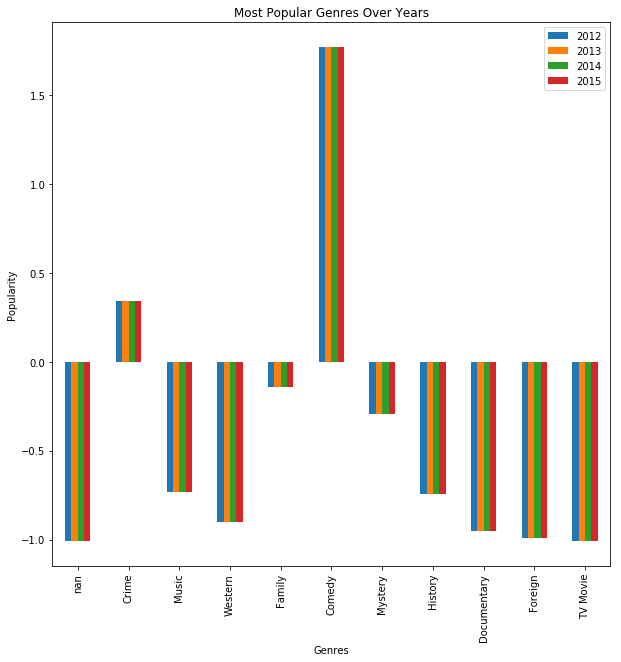

In [40]:
pop_genre.iloc[10:, 53:].plot(kind='bar',figsize=(10,10))
plt.title("Most Popular Genres Over Years")
plt.xlabel("Genres")
plt.ylabel("Popularity")

### Reasoning
* Bar chart here represents the relation between 'Genres'(Categorical Data Type) and corresponding popularity values.
* As an output of this question, I wanted to check the trend of movies industry as aresult of global crises and it is obvious that people escape from bad news into moments of laugh.

### Research Question 2 (Which year has highest release of movies?)

In [41]:
df_high = df.groupby('Release_year').count()['Id']

Text(0,0.5,'No.')

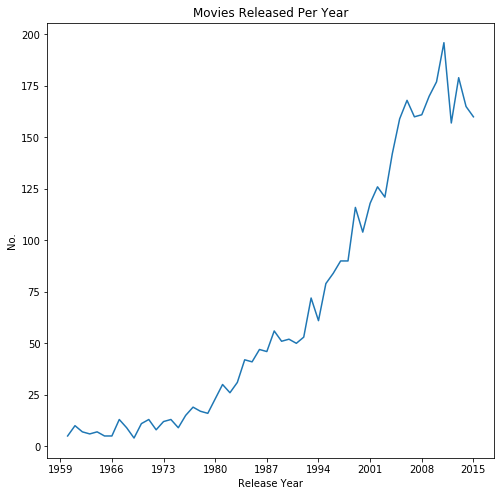

In [42]:
df.groupby('Release_year').count()['Id'].plot(xticks = np.arange(1959,2016,7),figsize=(8,8))
plt.title("Movies Released Per Year")
plt.xlabel("Release Year")
plt.ylabel("No.")

### Reasoning
* This line chart is graphical data that connects series of consecutive years versus no. of films produced. 
* Line chart is selected here visually representing single continuos line make it easy to track the rising in no. of films up to 2010 and also the degradation afetr this year.

### Research Question 3 (Which movies corresponding lowest and highest budget?)

In [43]:
df.loc[df['Budget'].idxmax()]

Id                                                          46528
Popularity                                                0.25054
Original_title                                  The Warrior's Way
Director                                               Sngmoo Lee
Runtime                                                       100
Genres                  Adventure|Fantasy|Action|Western|Thriller
Production_companies                     Boram Entertainment Inc.
Release_date                                  2010-12-02 00:00:00
Vote_count                                                     74
Vote_average                                                  6.4
Release_year                                                 2010
Budget                                                  425000000
Revenue                                                  11087569
Name: 2244, dtype: object

In [44]:
df.loc[df['Budget'].idxmin()]

Id                                                                  59296
Popularity                                                        0.52043
Original_title                                    Love, Wedding, Marriage
Director                                                  Dermot Mulroney
Runtime                                                                90
Genres                                                     Comedy|Romance
Production_companies    120dB Films|Scion Films|Voodoo Production Serv...
Release_date                                          2011-06-03 00:00:00
Vote_count                                                             55
Vote_average                                                          5.3
Release_year                                                         2011
Budget                                                                  0
Revenue                                                              1335
Name: 3581, dtype: object

In [45]:
budget_info=pd.DataFrame(df['Budget'].sort_values(ascending = False))

In [46]:
budget_info['Original_title'] =df['Original_title']

In [47]:
budget_data = list(map(str, (budget_info['Original_title'])))

In [48]:
x=list(budget_data[:15])
y=list(budget_info['Budget'][:15])

Text(0.5,0,'Budget')

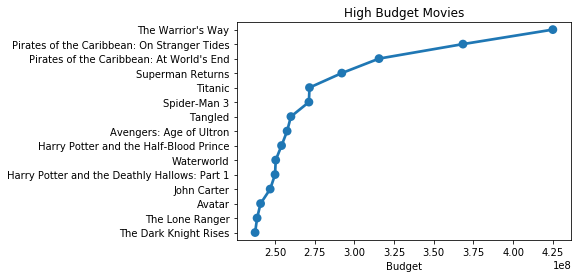

In [49]:
ax=sns.pointplot(x=y, y=x)
ax.set_title("High Budget Movies")
ax.set_xlabel("Budget")

### Reasoning
* Point plot help in meeting each point in x axis (here is budget) with its corresponding point in y axis (movie name).
* This relation was chosen as preface for studing the impact of increasing budget on movie success. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d199fd208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d193e6320>]], dtype=object)

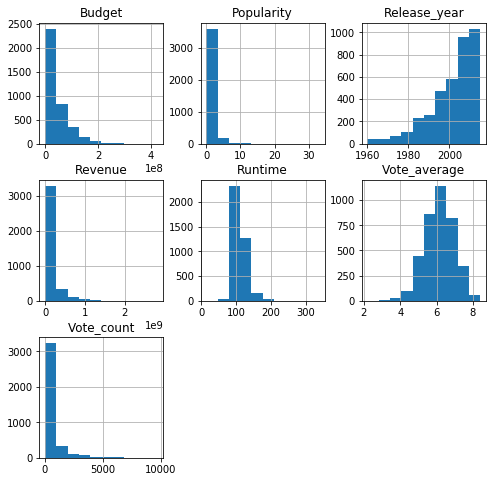

In [50]:
df.hist(figsize=(8,8))

### Reasoning
* Histograms plotted above to show the distribution of numerical values of columns.

<a id='conclusions'></a>
## Conclusions

#### After analysis of this data containing lareg number of movies and some features related and after applying some steps in order to elaborate and clean data like( fix data types, removing duplicates, dropping un-necessary columns..,) leading to estimate some correlations through asking some quesions:
* **Which genres are most popular from year to year?**
> Answer: recently comedy movies are taking the trend.


* **Which year has highest release of movies?**
> 2010 had a breaktrhough in releasing movies compared to other years


* **Which movies corresponding lowest and highest budget?**
> The Warrior's Way followed by Pirates of the Caribbean: On Stranger Tides consuming highest buget, on the other side The Dark Nights Rises consumed the least budget

#### Limitations
* Solution based on 3807 result instead of 10866 after dropping zero values and nan values.
* Results related to budget and revenue are function of (adjusted budget & adjusted revenue)
* Answering the first question required separating (Genres Column) into list instead of ("|" separated string)
* Some columns dropped cause I did not need in my solution, but you may need them for some other conclusions.




## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0